# Exploratory Data Analysis (EDA)

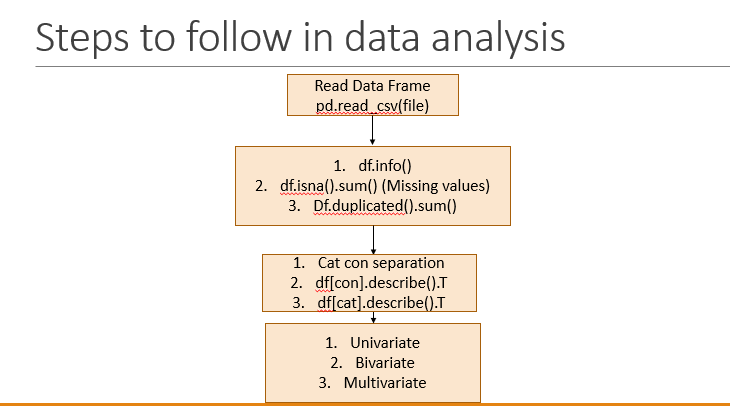

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [5]:
path = r"C:\ETLHive lectures by me\Datasets\laptopPrice.csv"
print(path)

C:\ETLHive lectures by me\Datasets\laptopPrice.csv


In [6]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Step 2 - Perform Basic data quality checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [9]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [10]:
df.duplicated().sum()

21

In [11]:
# Remove the duplicate rows
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [12]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


### Step 3 - Descriptive statistics

In [14]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [15]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [16]:
cat = list(df.columns[df.dtypes == "object"])
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [17]:
con = list(df.columns[df.dtypes != "object"])
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [18]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


In [19]:
df[cat].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [20]:
df["brand"].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

### Step 4 : Data visualization
1. Univariate
2. Bivariate
3. Multivariate

Libraries - seaborn, matplotlib

### Univariate

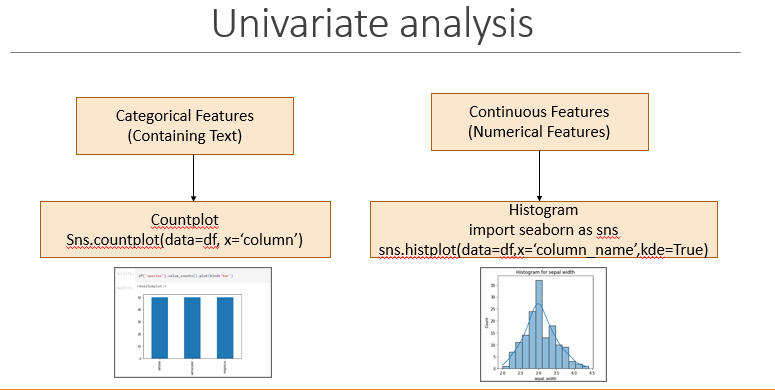

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df["brand"].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

### Categorical - Countplot

<Axes: xlabel='brand', ylabel='count'>

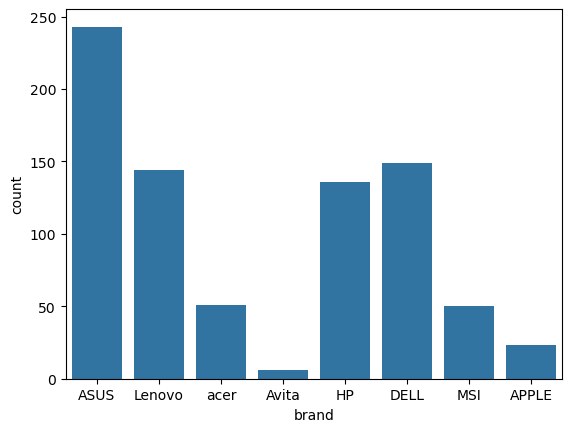

In [26]:
sns.countplot(data=df, x="brand")

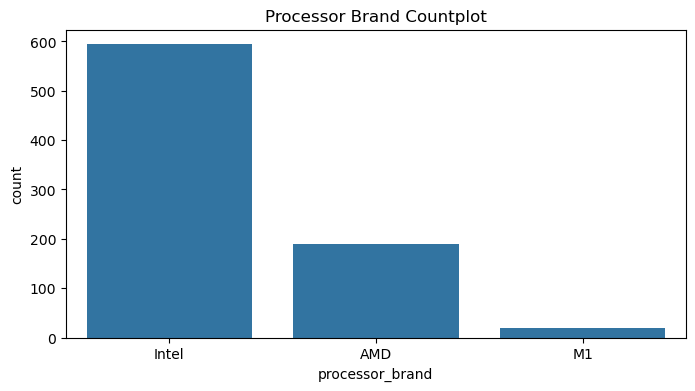

In [27]:
plt.figure(figsize=(8, 4)) # This is used to set plot size
sns.countplot(data=df, x="processor_brand") # Plot the data
plt.title("Processor Brand Countplot") # Add the title to plot
plt.show() # To show only the plot

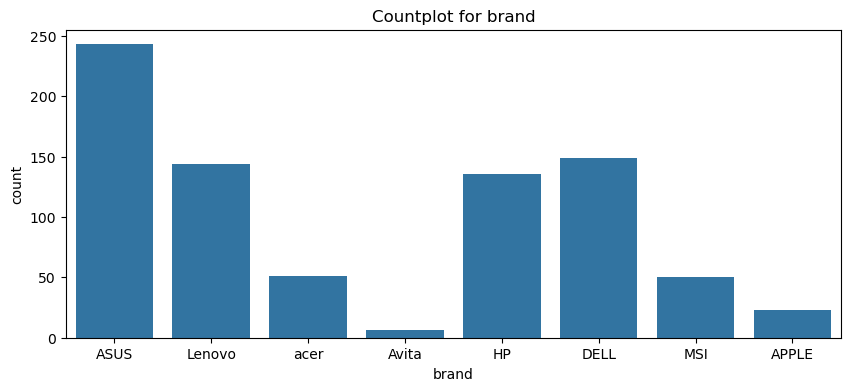

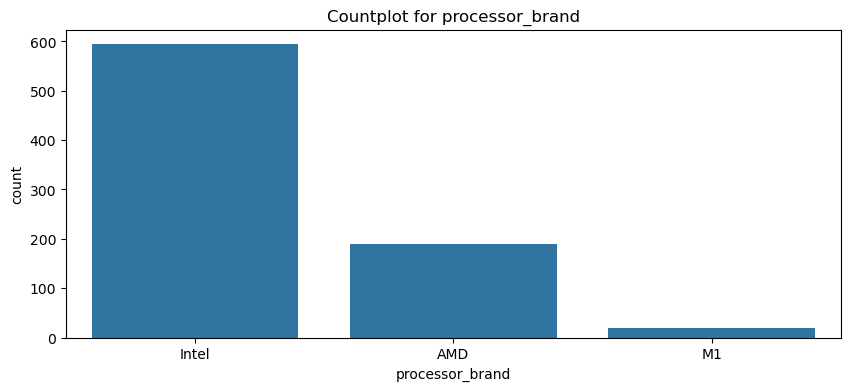

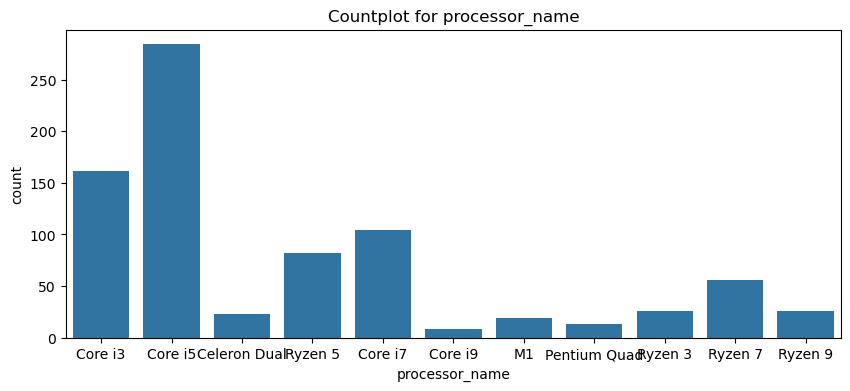

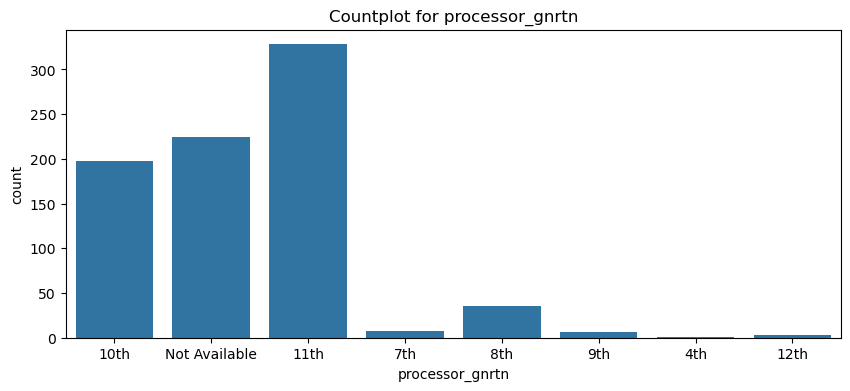

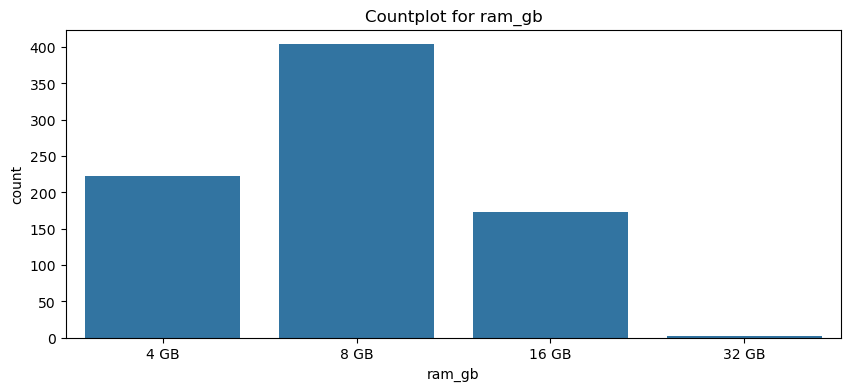

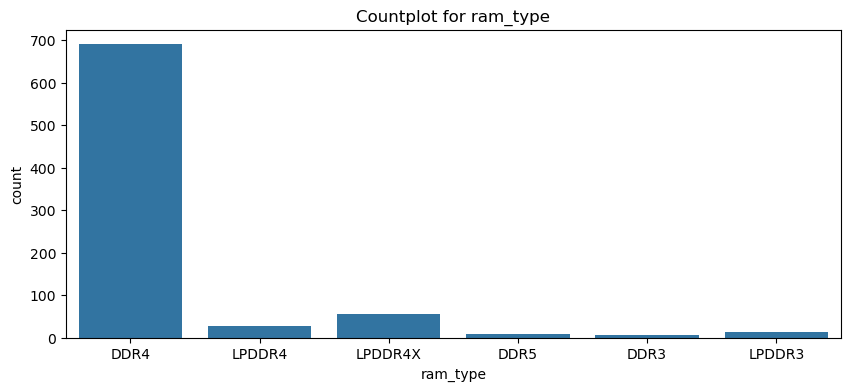

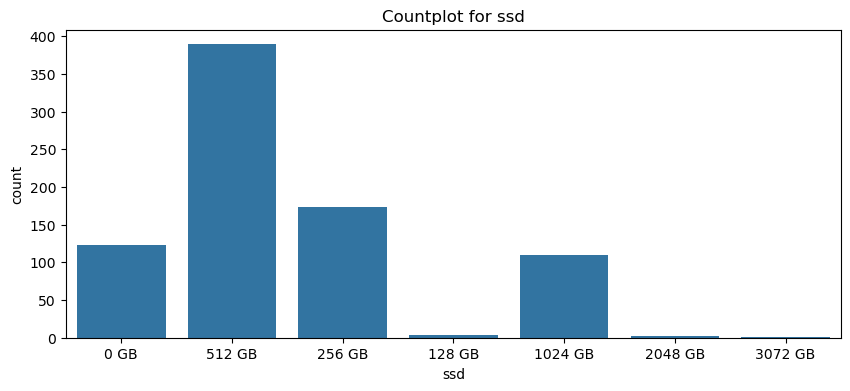

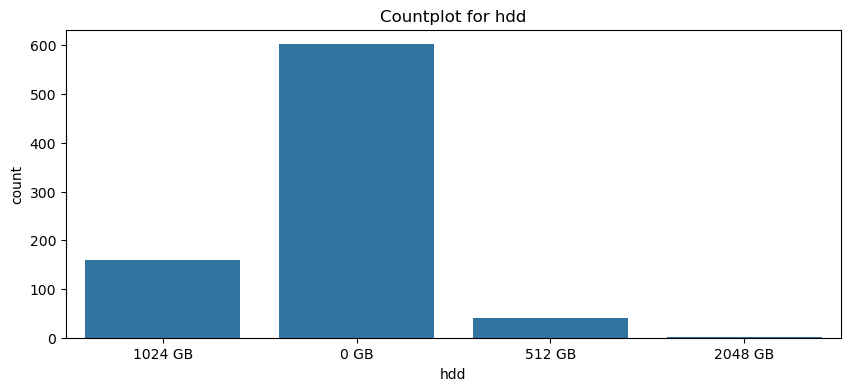

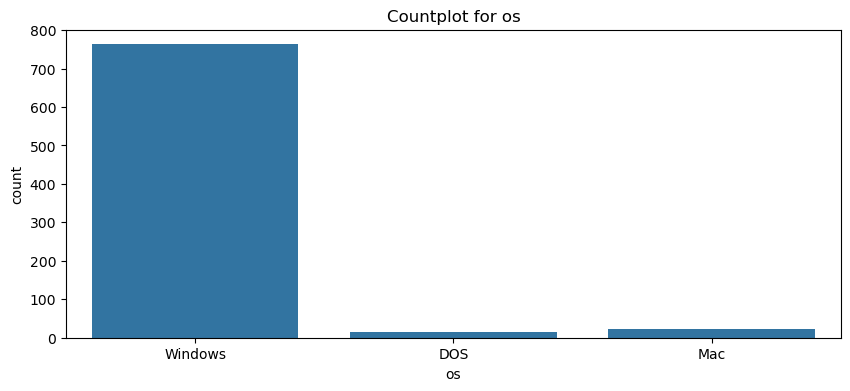

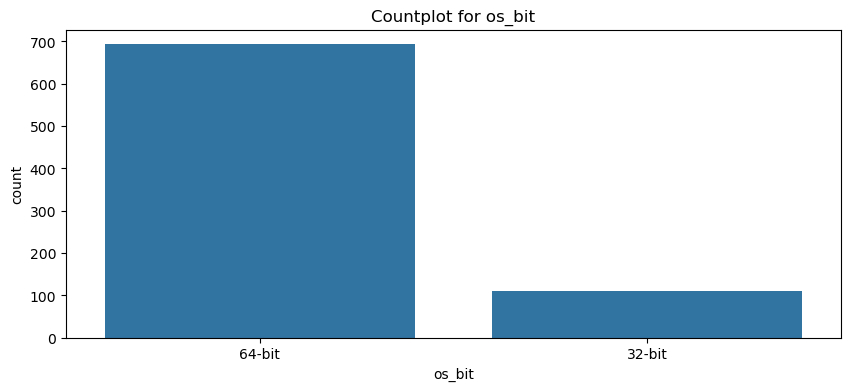

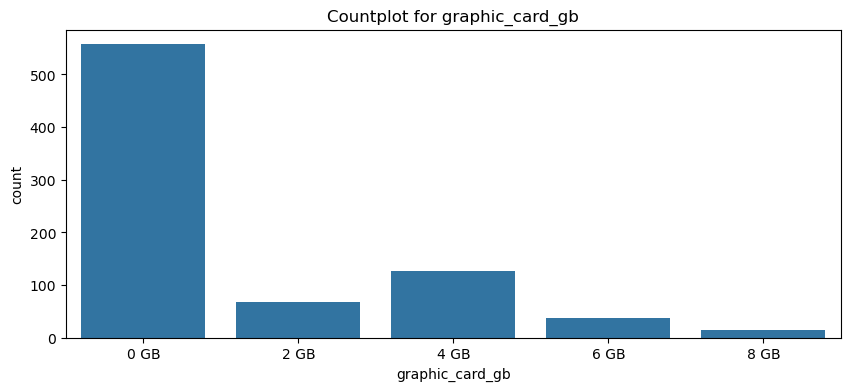

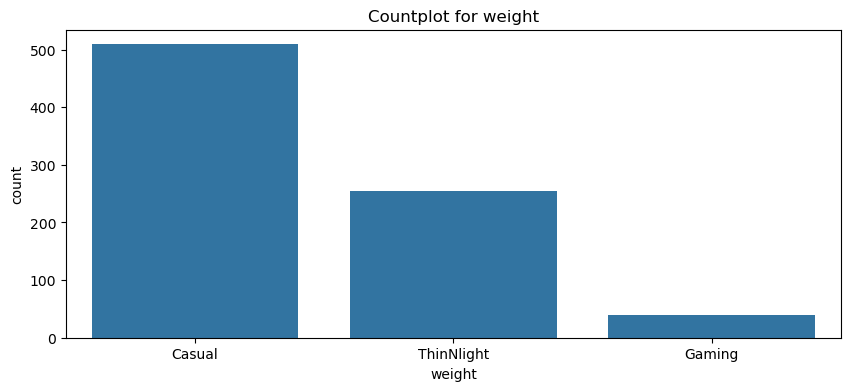

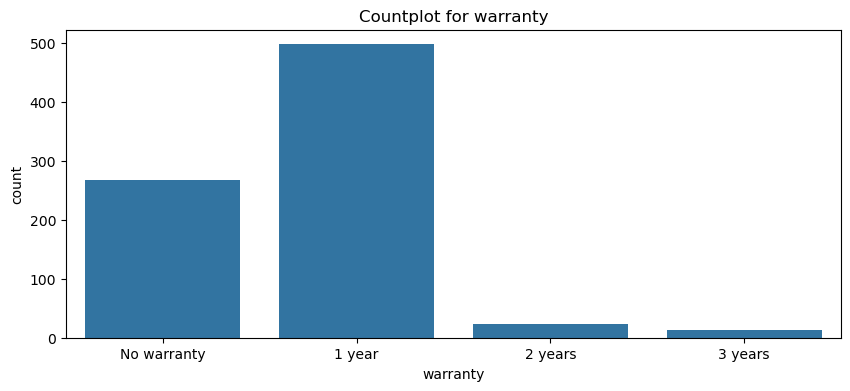

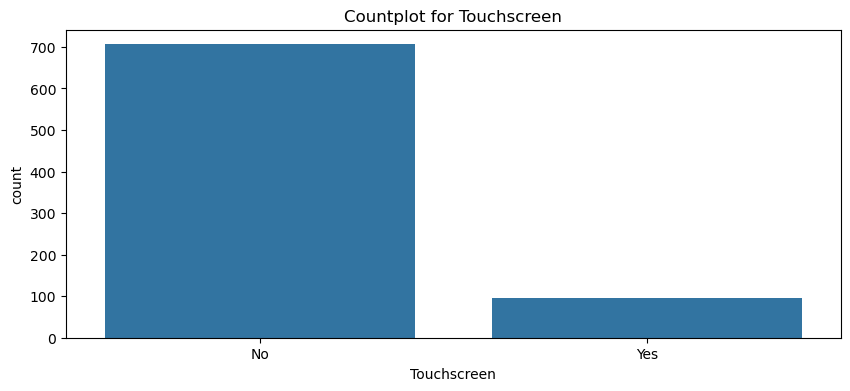

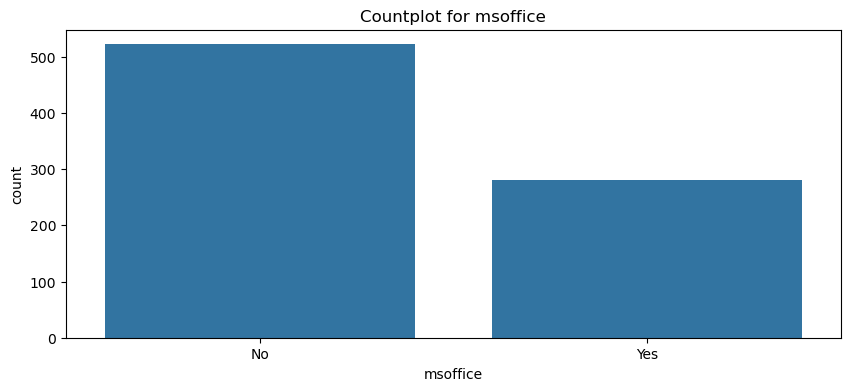

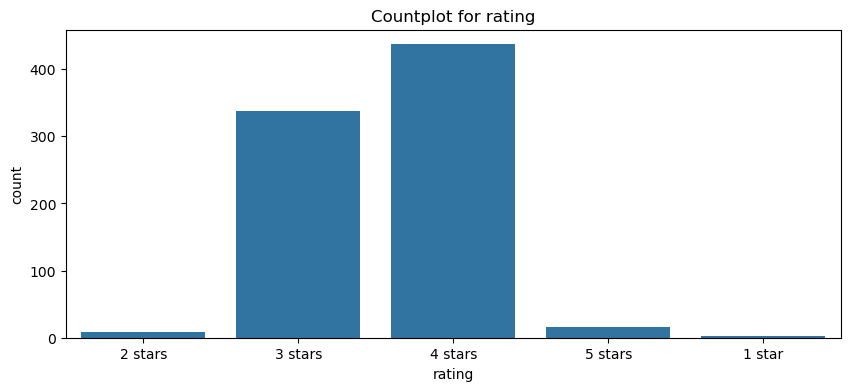

In [28]:
for i in cat:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=i)
    plt.title(f"Countplot for {i}")
    plt.show()

### Continuous - Histogram

In [30]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

kde - Kernel Density Estimate

<Axes: xlabel='Price', ylabel='Count'>

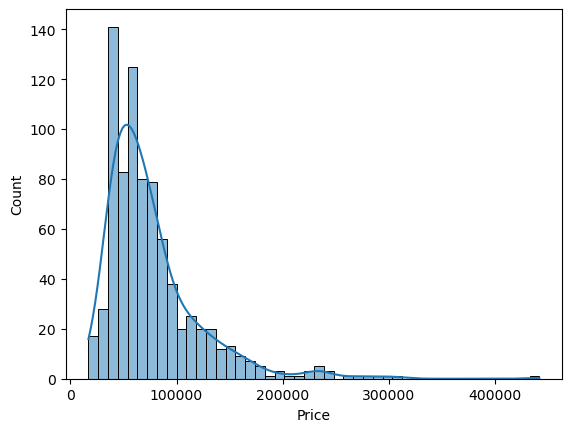

In [32]:
sns.histplot(data=df, x="Price", kde=True)

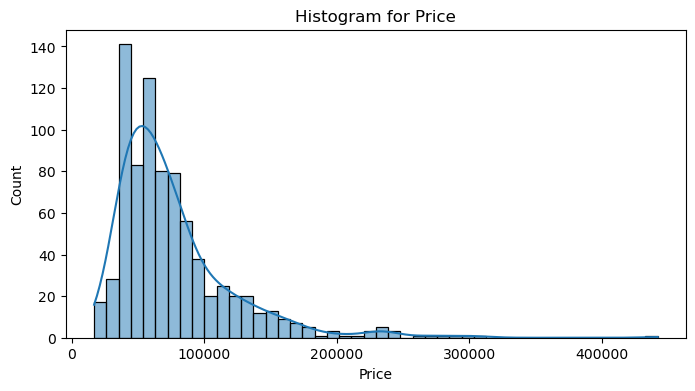

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Price", kde=True)
plt.title("Histogram for Price")
plt.show()

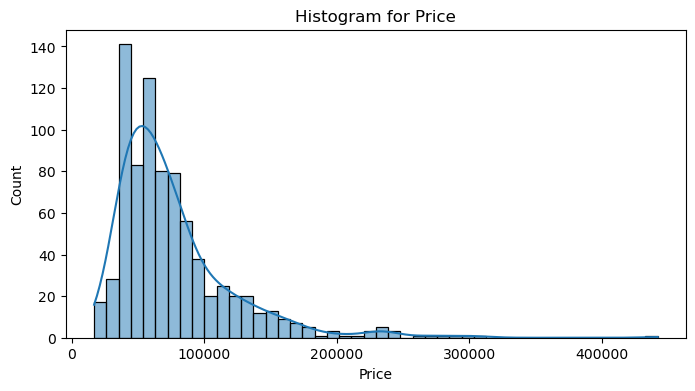

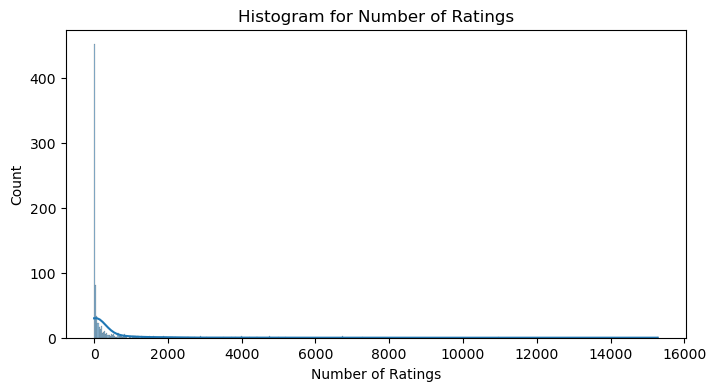

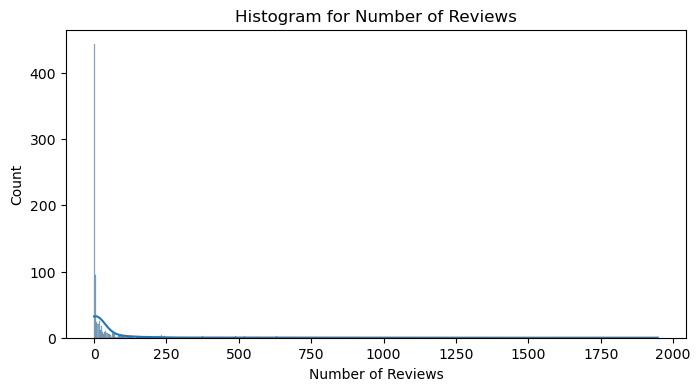

In [34]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Histogram for {i}")
    plt.show()

In [35]:
df.query("`Number of Ratings` == 0")

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,ASUS,AMD,Ryzen 9,Not Available,4 GB,LPDDR4X,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,Yes,Yes,234990,3 stars,0,0
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0


### B. Bivariate analysis (Continous - numerical, Categorical - text)

In [63]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [65]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

1. Continuous vs Continuous - Scatterplot, Regplot
2. Categorical vs Continuous - Boxplots
3. Categorical vs Categorical - Crosstab heatmap

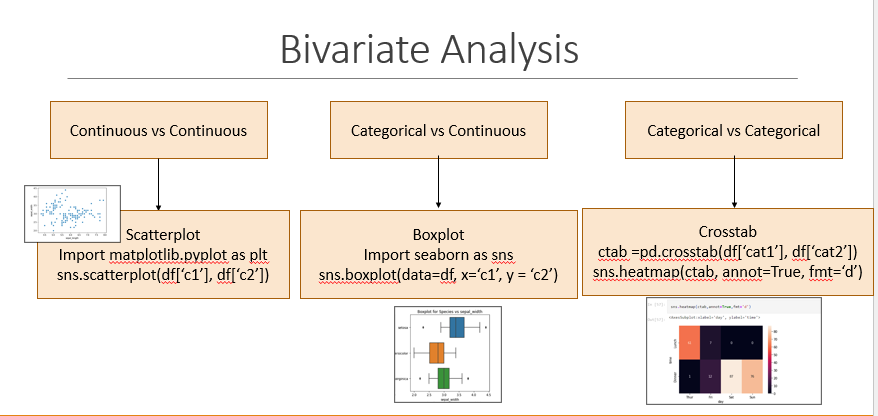

### Coninuous vs continous - Scatterplot

<Axes: xlabel='Number of Ratings', ylabel='Price'>

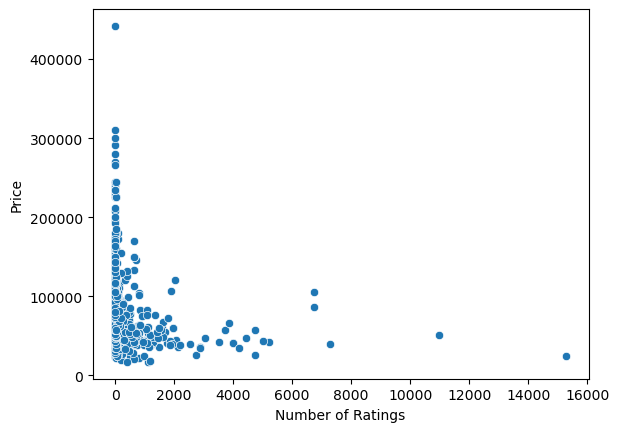

In [69]:
sns.scatterplot(data=df, x="Number of Ratings", y="Price")

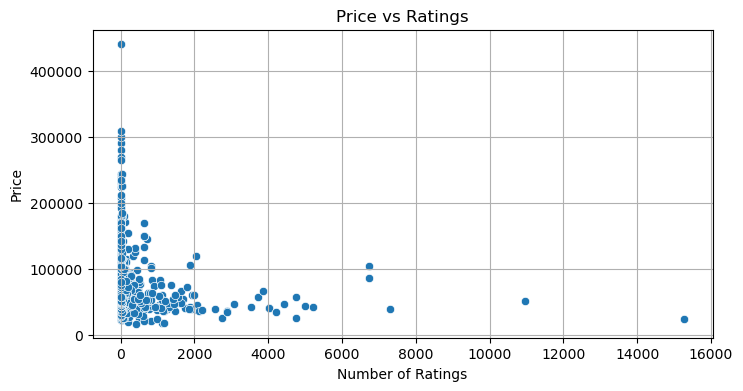

In [73]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Ratings", y="Price")
plt.title("Price vs Ratings")
plt.grid()
plt.show()

In [75]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

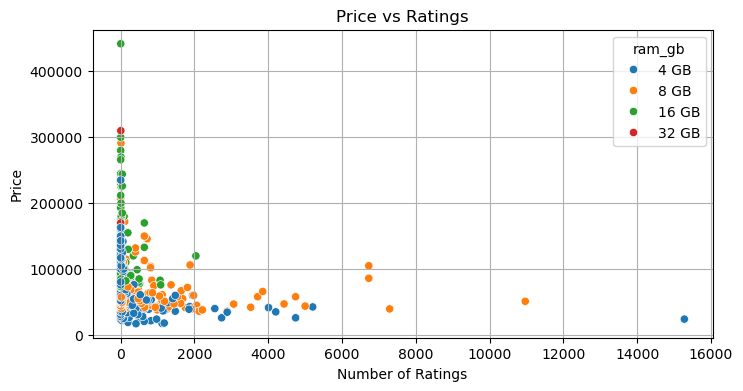

In [77]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Ratings", y="Price", hue="ram_gb")
plt.title("Price vs Ratings")
plt.grid()
plt.show()

In [79]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

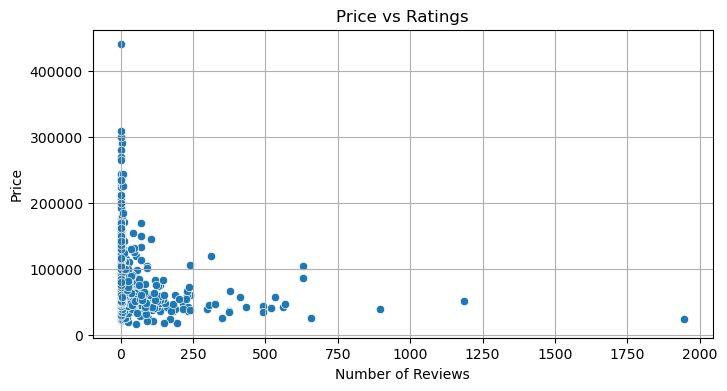

In [81]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Reviews", y="Price")
plt.title("Price vs Ratings")
plt.grid()
plt.show()

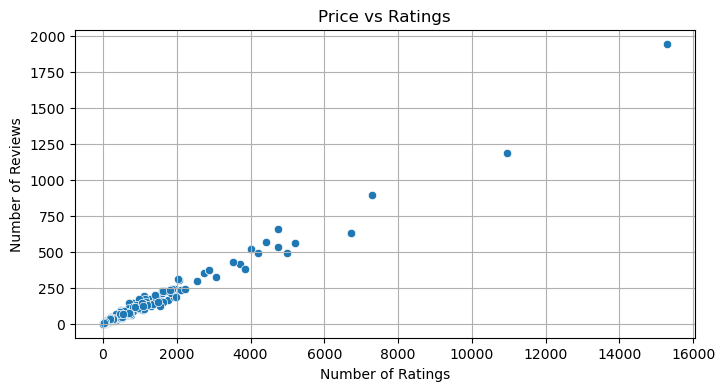

In [83]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Ratings", y="Number of Reviews")
plt.title("Price vs Ratings")
plt.grid()
plt.show()

### Number of Ratings and Number of Reviews has aproximatley a linear relationship

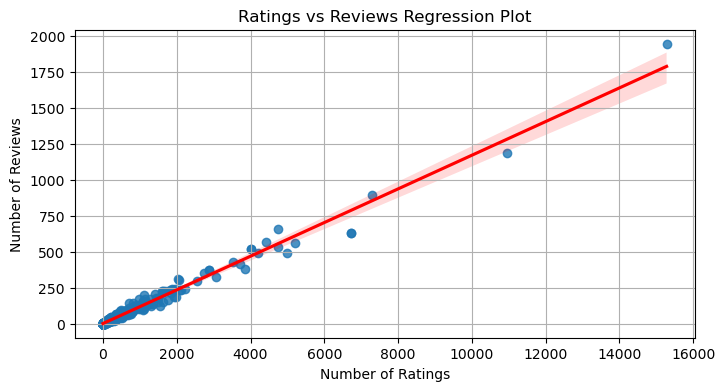

In [90]:
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x="Number of Ratings", y="Number of Reviews", line_kws={"color":"red"})
plt.title("Ratings vs Reviews Regression Plot")
plt.grid()
plt.show()

### Categorical vs Continuous - Boxplots

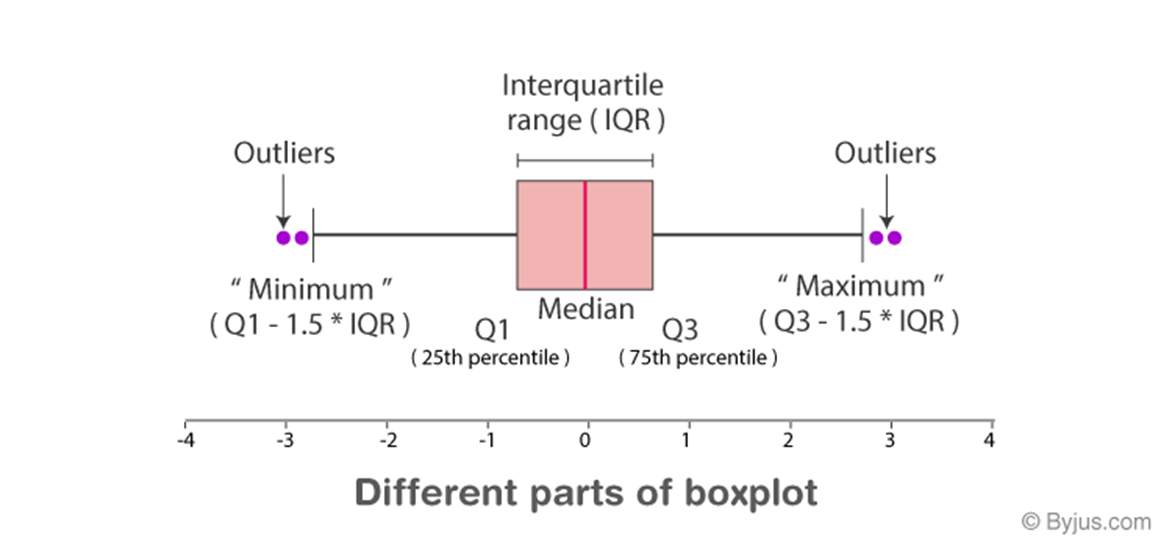

In [95]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [97]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

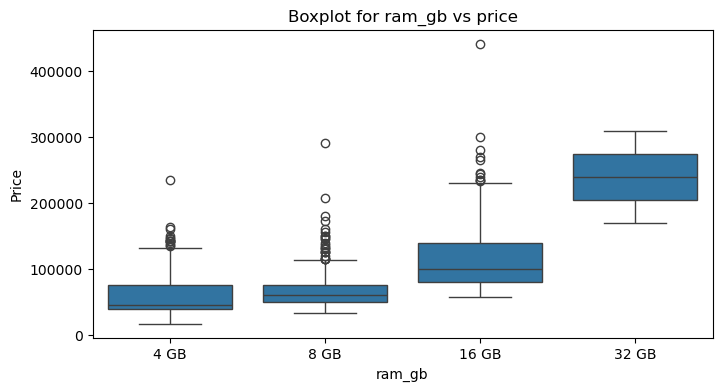

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="ram_gb", y="Price")
plt.title("Boxplot for ram_gb vs price")
plt.show()

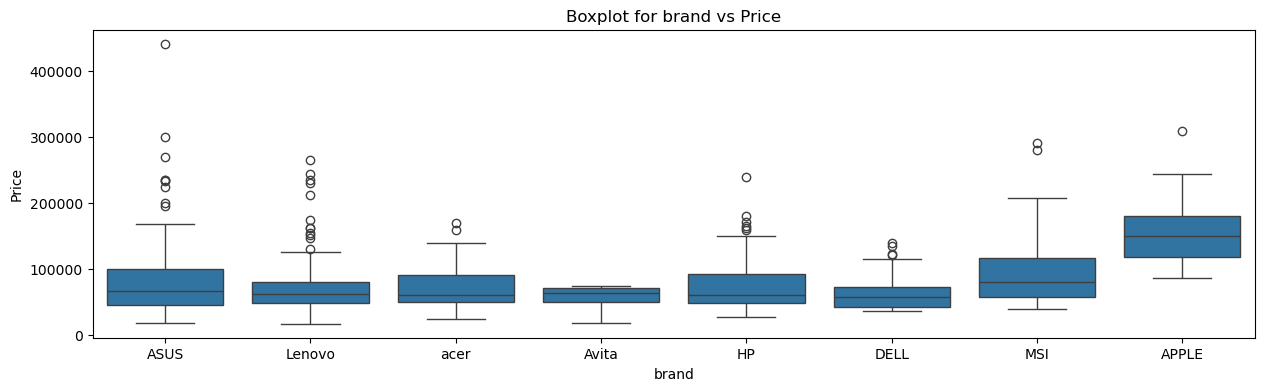

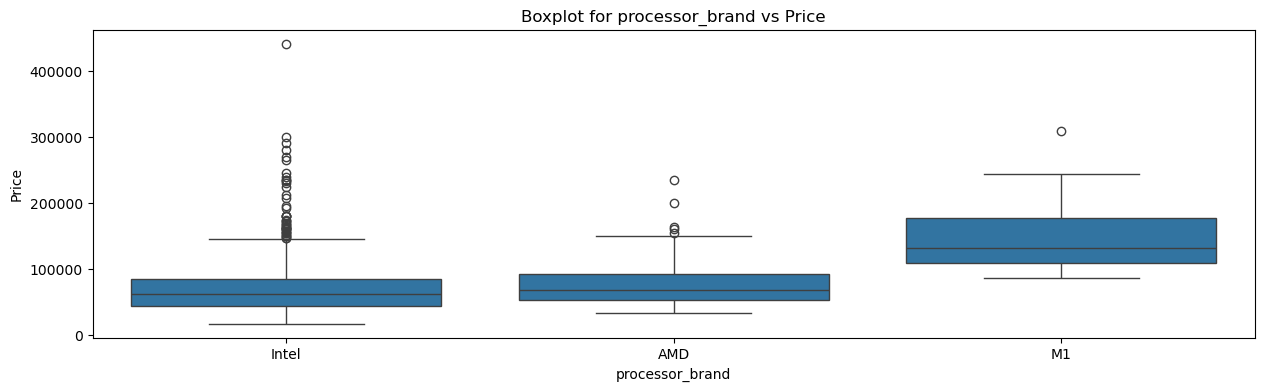

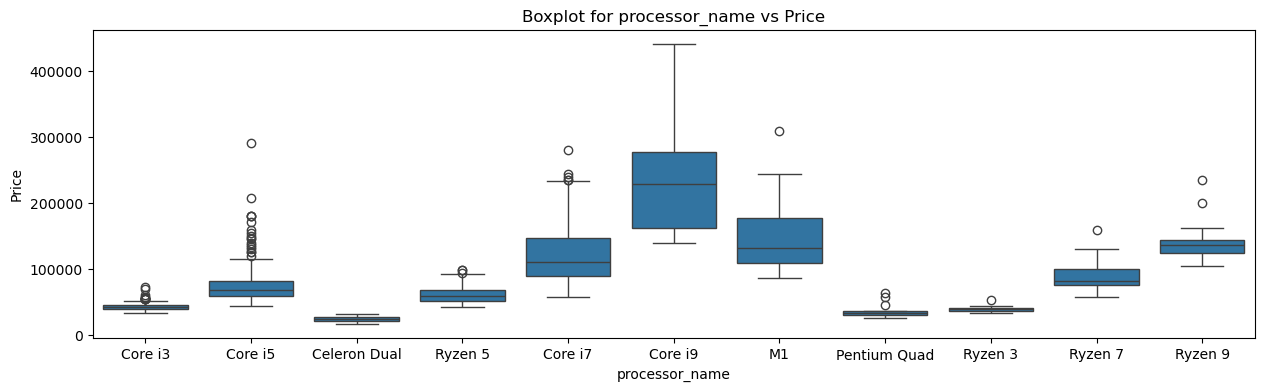

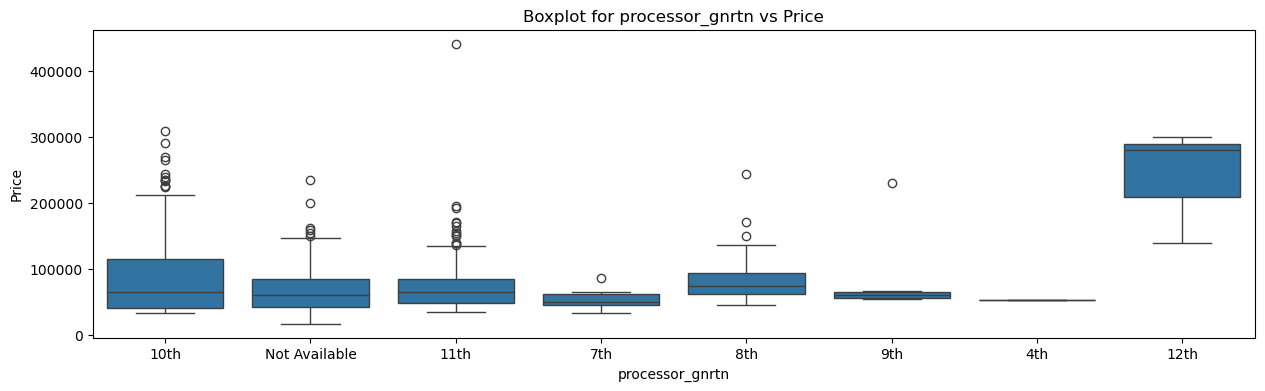

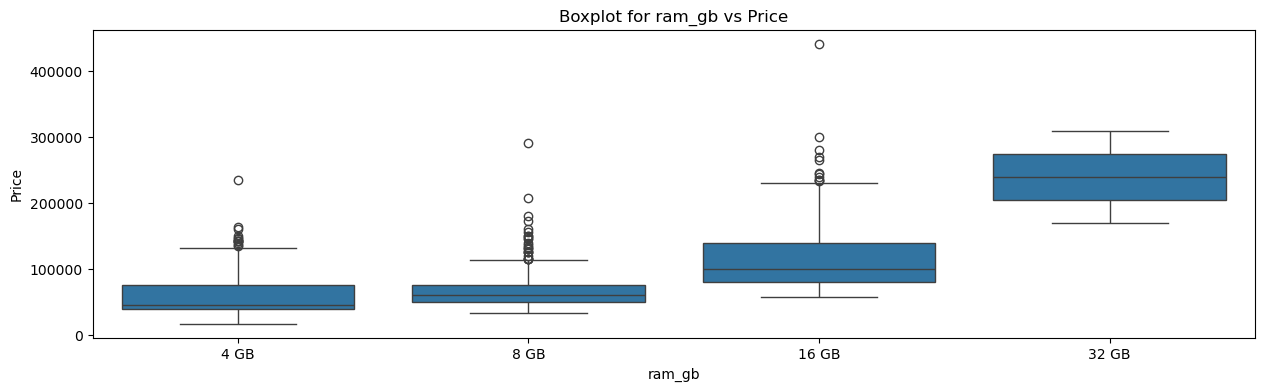

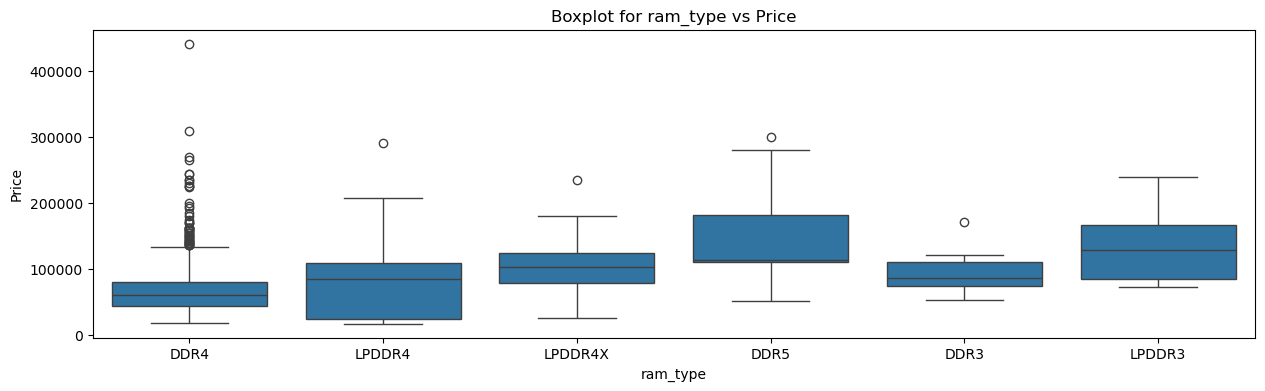

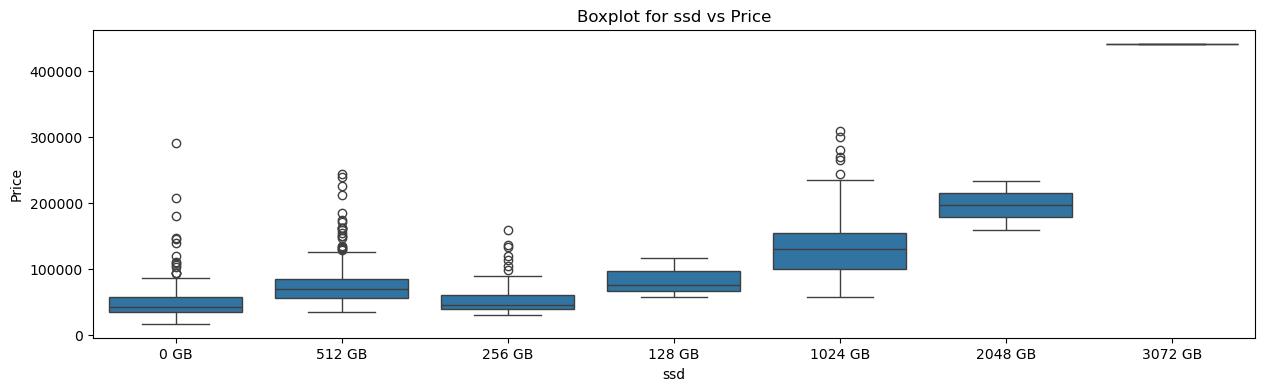

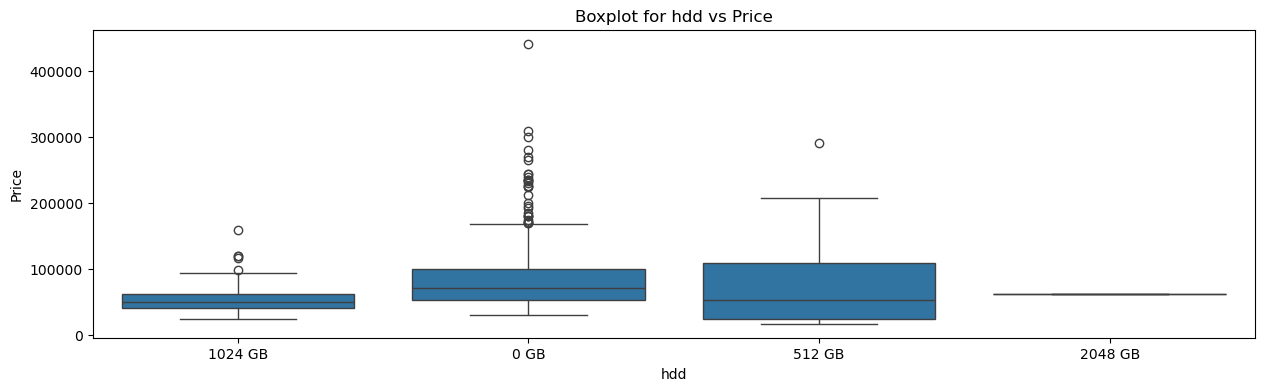

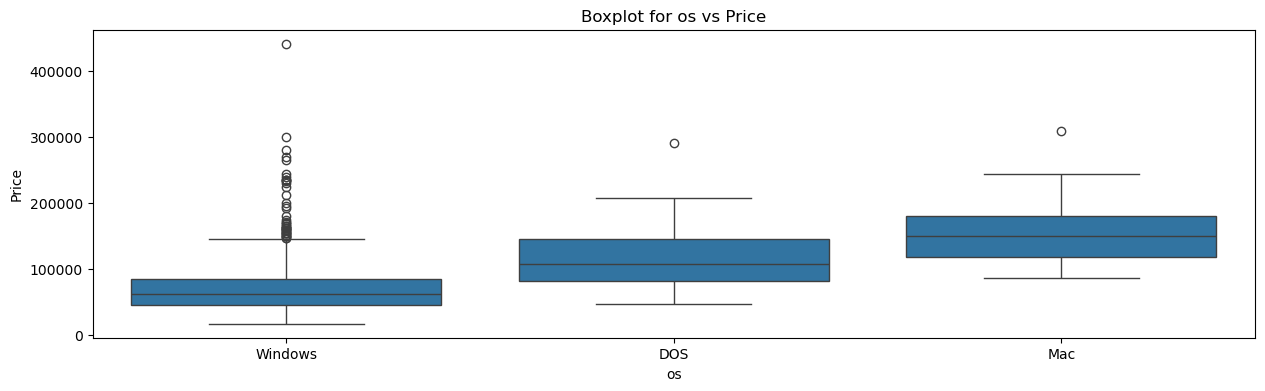

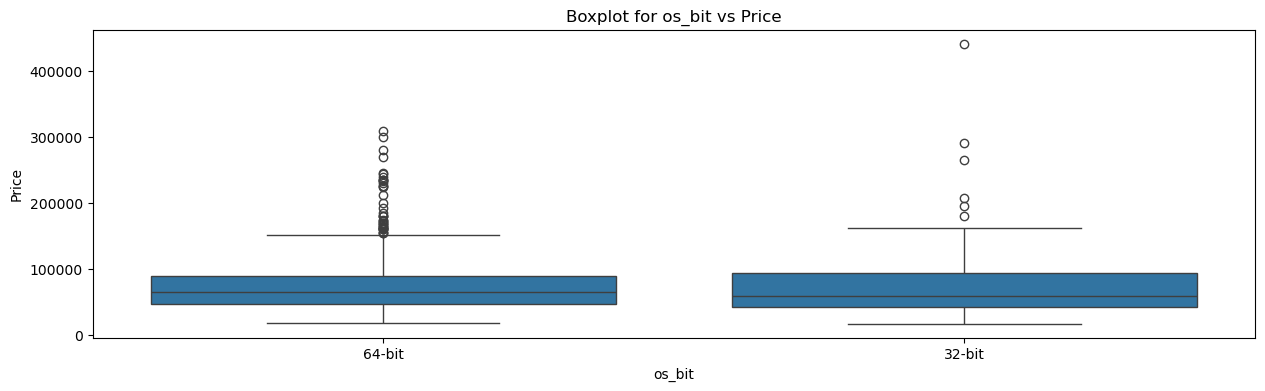

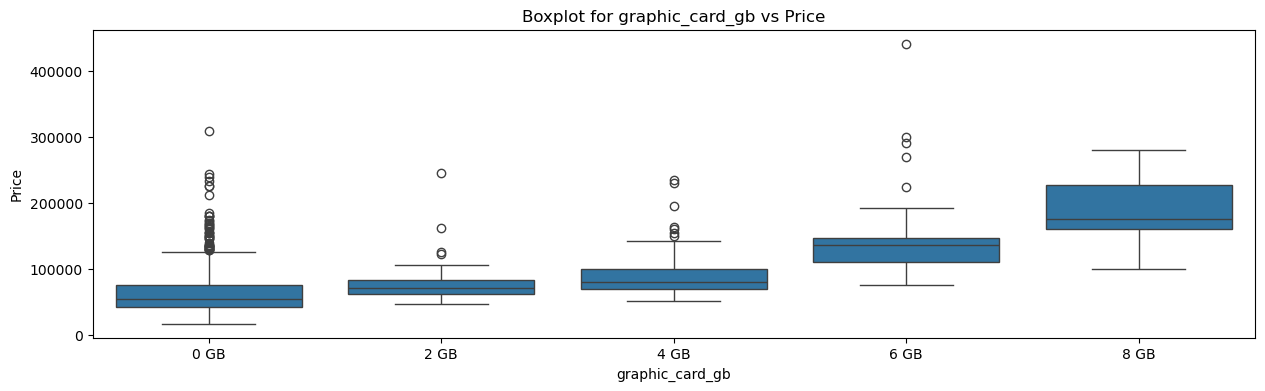

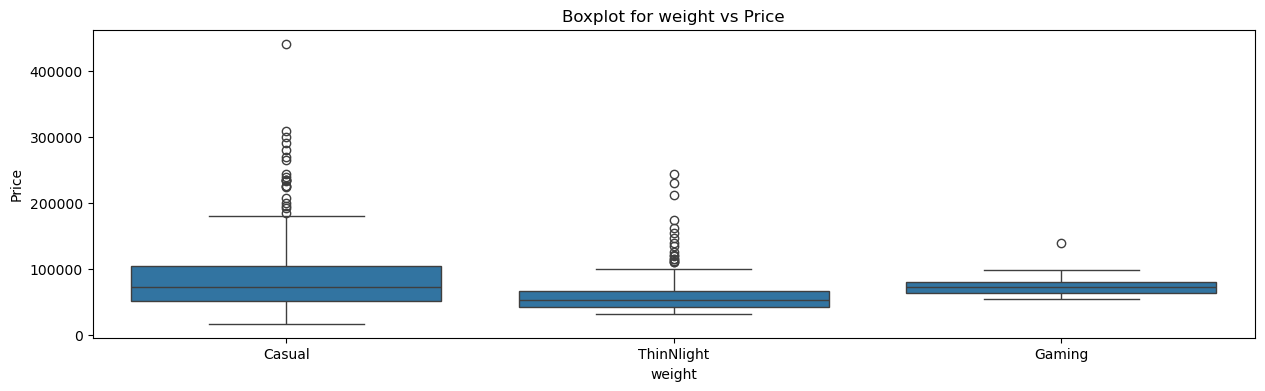

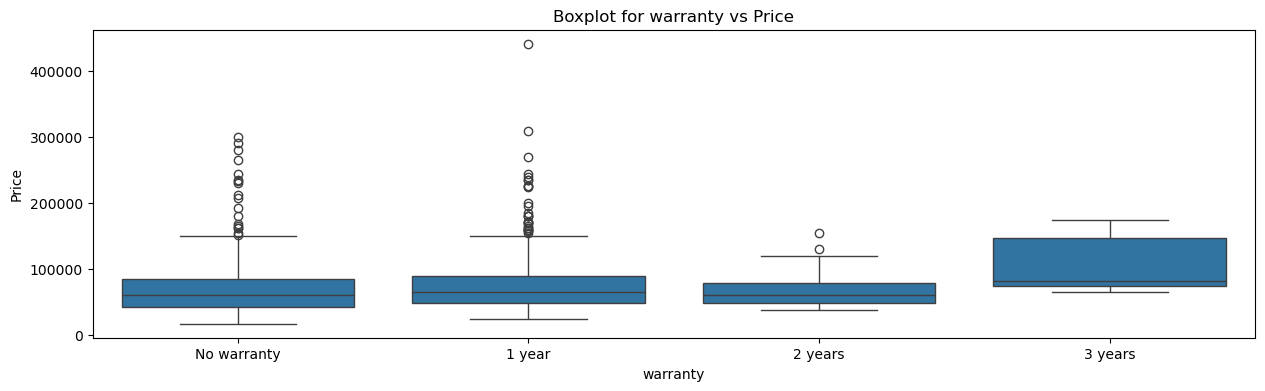

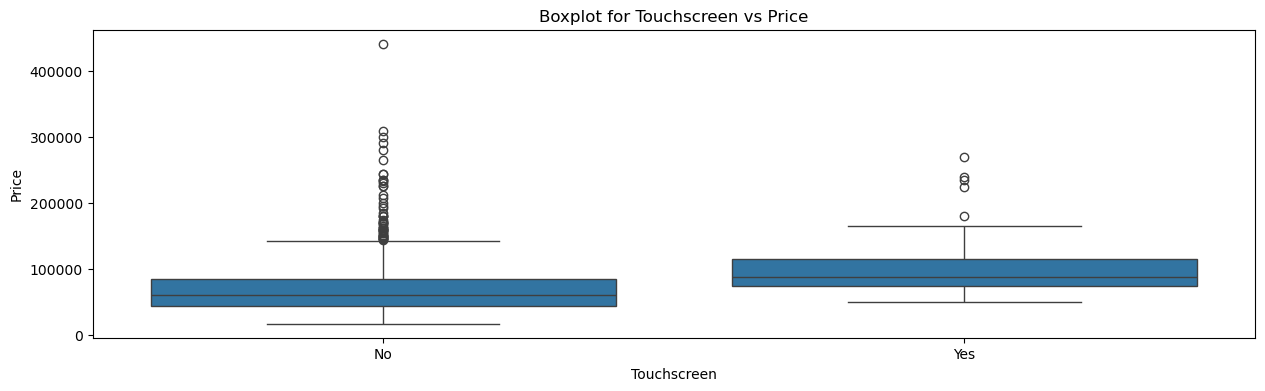

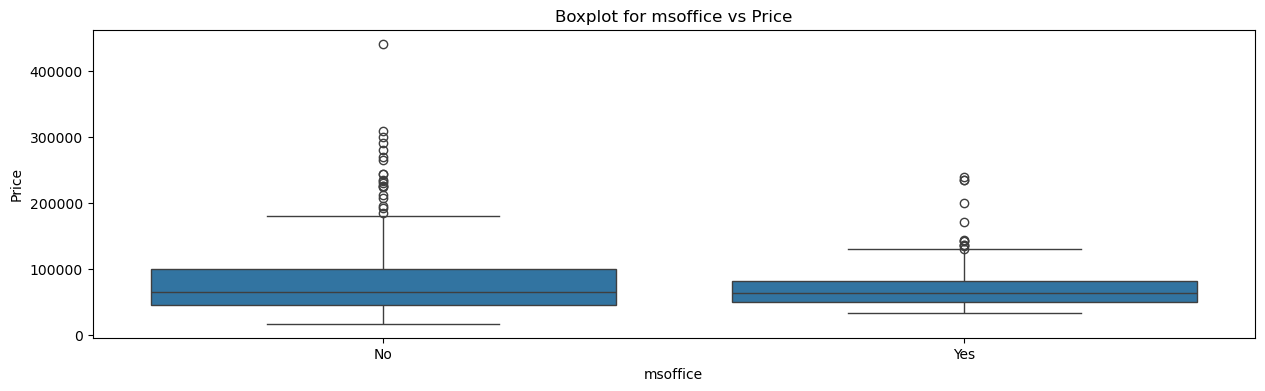

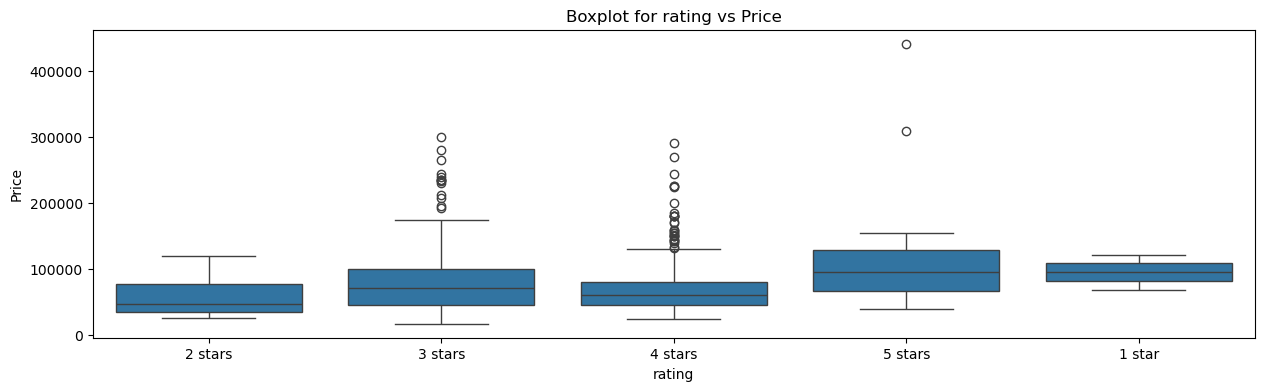

In [105]:
for i in cat:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=df, x=i, y="Price")
    plt.title(f"Boxplot for {i} vs Price")
    plt.show()

### Categorical vs Categorical - Crosstab Heatmap

In [108]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [110]:
len(cat)

16

In [112]:
ctab1 = pd.crosstab(df["ram_gb"], df["ram_type"])
ctab1

ram_type,DDR3,DDR4,DDR5,LPDDR3,LPDDR4,LPDDR4X
ram_gb,,,,,,
16 GB,2,140,2,8,1,20
32 GB,0,2,0,0,0,0
4 GB,0,197,4,0,10,12
8 GB,5,351,2,6,16,24


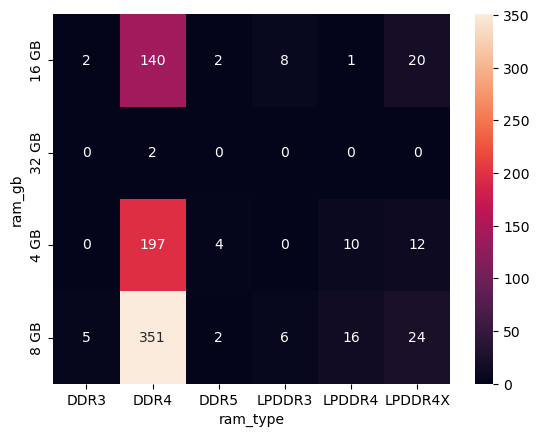

In [120]:
sns.heatmap(data=ctab1, annot=True, fmt="d")
plt.show()

In [122]:
ctab2 = pd.crosstab(df["brand"], df["warranty"])

In [124]:
ctab2

warranty,1 year,2 years,3 years,No warranty
brand,,,,
APPLE,23,0,0,0
ASUS,150,0,0,93
Avita,0,0,0,6
DELL,96,0,1,52
HP,110,0,0,26
Lenovo,71,11,11,51
MSI,11,12,1,26
acer,37,0,0,14


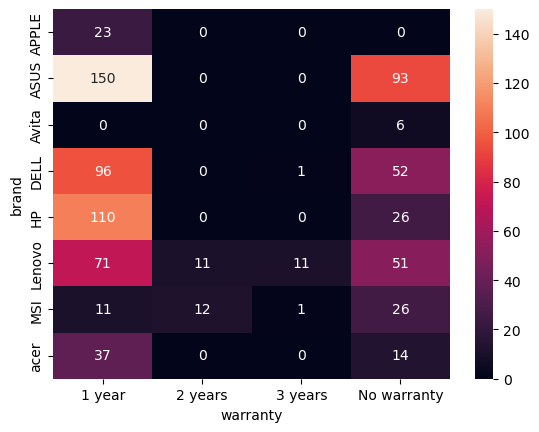

In [126]:
sns.heatmap(data=ctab2, annot=True, fmt="d")
plt.show()

### C. Multivariate analysis
1. pairplot
2. correlation heatmap

In [132]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

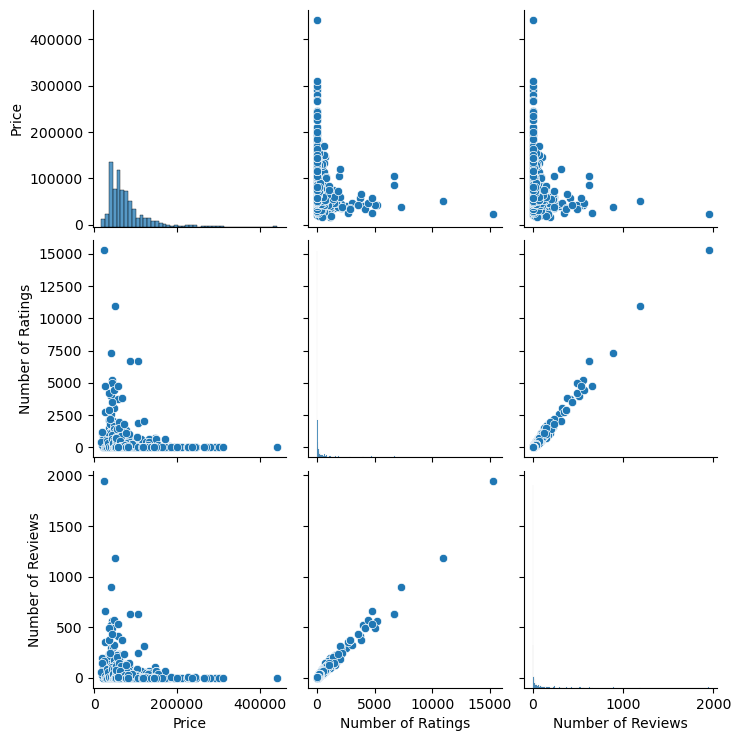

In [134]:
sns.pairplot(data=df)

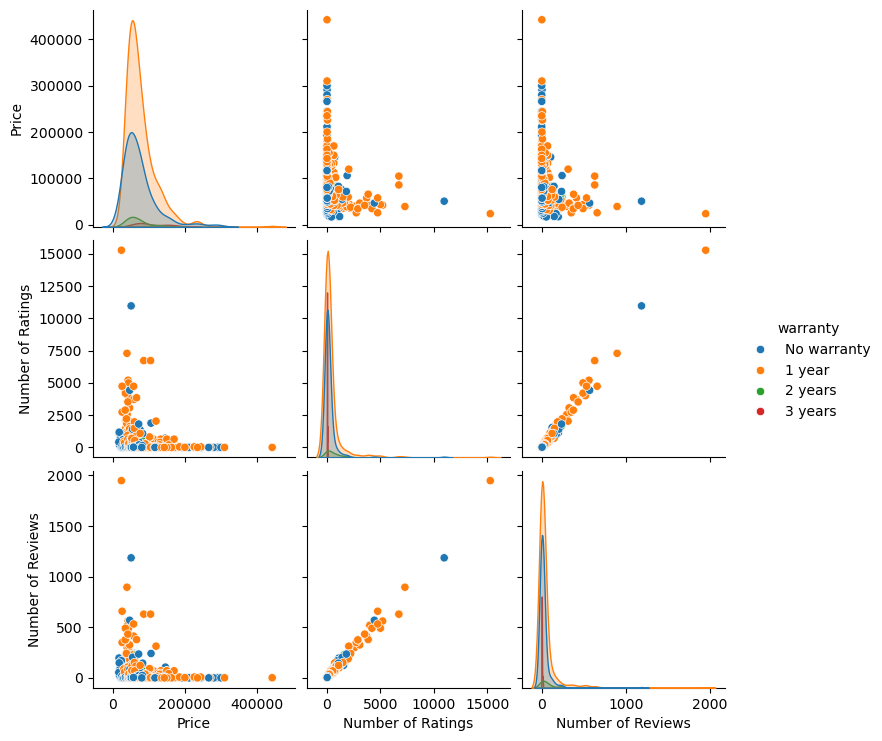

In [136]:
sns.pairplot(data=df, hue="warranty")

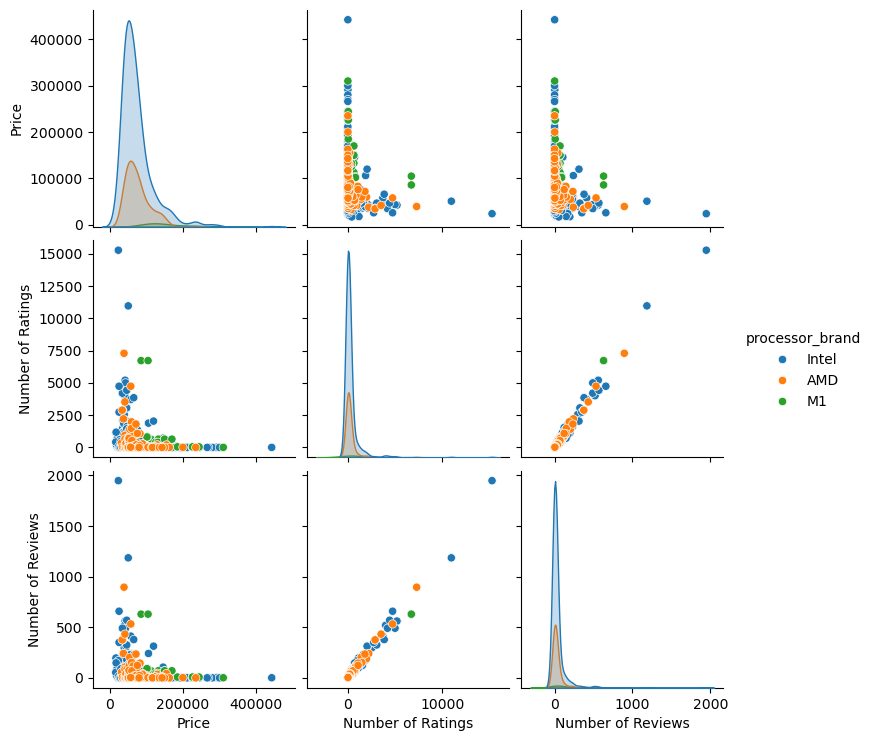

In [138]:
sns.pairplot(data=df, hue="processor_brand")

### Correlation heatmap

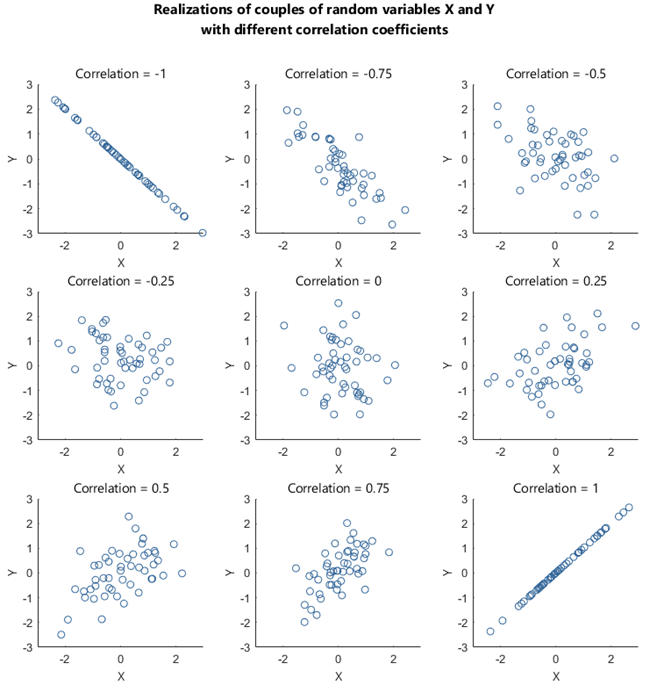

In [144]:
cor = df.corr(numeric_only=True)
cor

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

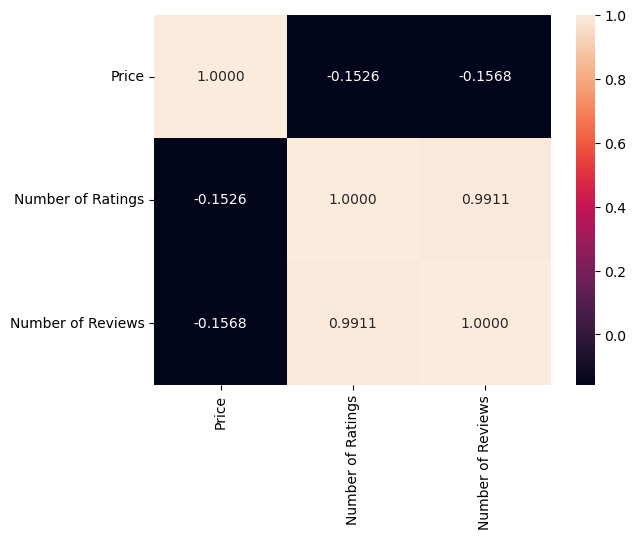

In [151]:
sns.heatmap(data=cor, annot=True, fmt=".4f")

### Extra Analysis with group by and aggregation

### 1. Find out average price of laptop by brand

In [165]:
a = df.groupby(by="brand") \
    .agg({"Price":"mean"}) \
    .sort_values(by="Price") \
    .round(2)

In [167]:
a

,Price
brand,
Avita,56346.50
DELL,60788.95
acer,72420.04
Lenovo,72920.21
HP,73640.27
ASUS,79426.02
MSI,98713.02
APPLE,157081.30


<Axes: ylabel='brand'>

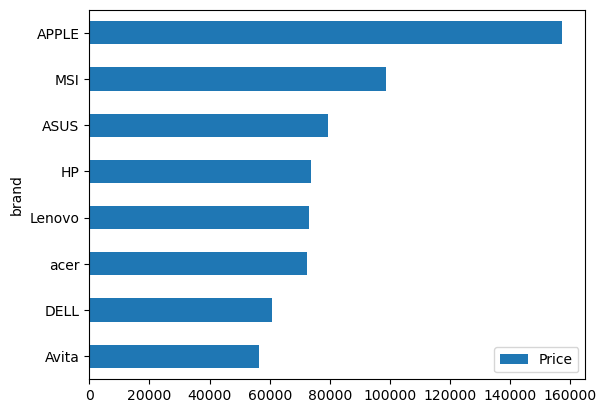

In [169]:
a.plot(kind="barh")

### 2. Find out median price by Rating and warranty

In [173]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [175]:
b = df.groupby(by=["rating", "warranty"]) \
    .agg({"Price":"median"}) \
    .sort_values(by="Price")

In [177]:
b

Price
rating  warranty             
5 stars 2 years       39999.0
2 stars No warranty   40519.5
4 stars 2 years       59990.0
        1 year        59999.0
        No warranty   60990.0
3 stars No warranty   61869.5
4 stars 3 years       68990.0
3 stars 2 years       74990.0
        1 year        76990.0
2 stars 1 year        78000.0
5 stars No warranty   78490.0
1 star  1 year        94990.0
3 stars 3 years      103686.0
5 stars 1 year       105990.0

<Axes: ylabel='rating,warranty'>

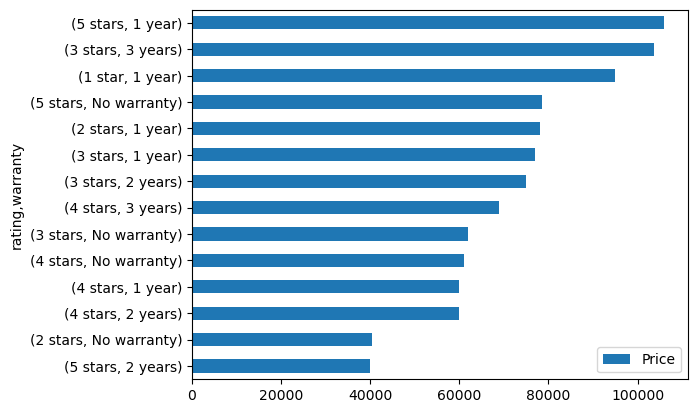

In [179]:
b.plot(kind="barh")

### Quickly creating and EDA report

In [182]:
%pip install ydata-profiling


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
from ydata_profiling import ProfileReport

In [186]:
profile = ProfileReport(df, title="Laptop Prices Report")

In [188]:
import os
os.chdir(r"C:\report") # Provide your folder path here with shift + Rightclicl

In [190]:
profile.to_file("laptop_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]